# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [89]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#root_dir = '/Specify/Path/' # this is to be defined by you 
#local_path = '/datasets/COMP5611M_Assessment/' # store the related data files in this folder

data_dir = '/content/drive/MyDrive/ML Coursework/'
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'
test_data_path =  data_dir + 'Test_data_example.csv'
test_target_path = data_dir + 'Test_data_example_targets.csv'

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [32]:
train_df = pd.read_csv(training_data_path)
target_df = pd.read_csv(training_targets_path)
test_df = pd.read_csv(test_data_path)
test_target_df = pd.read_csv(test_target_path)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

In [6]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TARGET_deathRate  2438 non-null   float64
dtypes: float64(1)
memory usage: 19.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedf0634f10>,
      dtype=object)

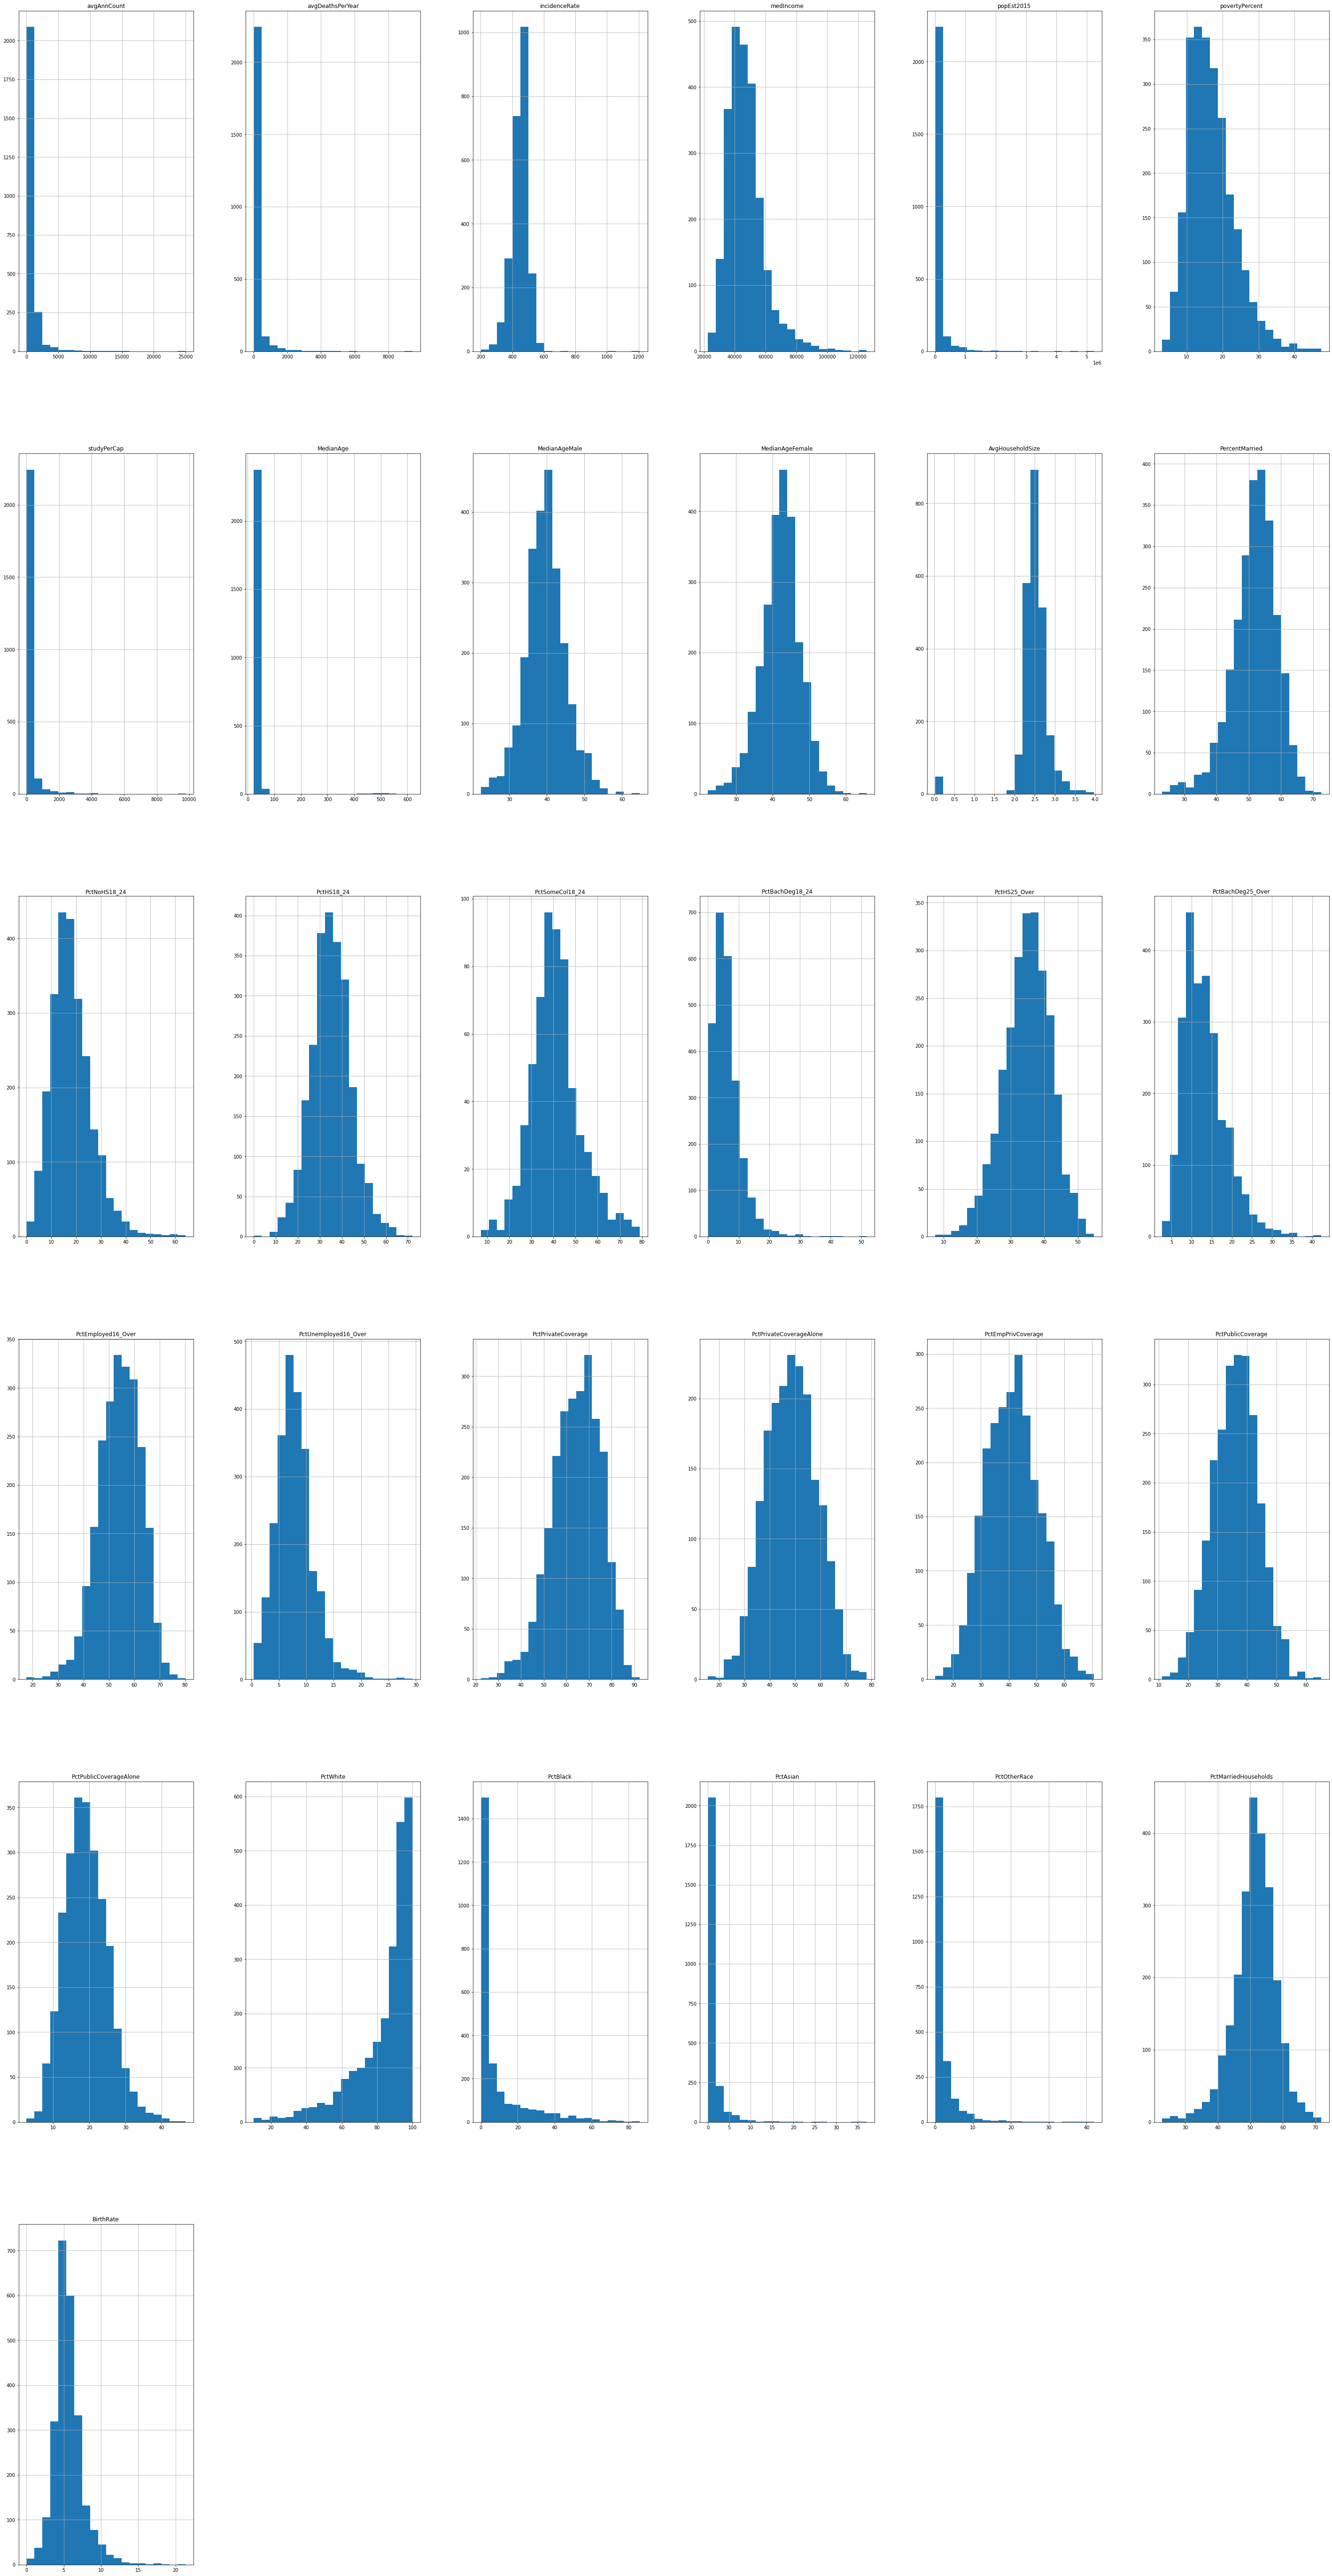

In [103]:
train_df.hist(bins=20,figsize=(50,100))

From these plots we can see that there are outeliers in some of the features such as MedianAge and AvgHouseholdSize. Age of 500 is impossible and household of less than 1 is impossible. Incidence rate also looks like it has outeliers but not too sure.


In [8]:
new_train_df = train_df.copy()
new_train_df['TARGET_deathRate'] = target_df['TARGET_deathRate']
train_corr = new_train_df.corr()
train_corr['TARGET_deathRate'] = train_corr['TARGET_deathRate'].abs()
sorted_df = train_corr.sort_values('TARGET_deathRate', ascending=False)

In [9]:
sorted_target = sorted_df['TARGET_deathRate']
sorted_target

TARGET_deathRate           1.000000
PctBachDeg25_Over          0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                  0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over         0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage         0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone    0.355050
PctMarriedHouseholds       0.290645
PctBachDeg18_24            0.284566
PctHS18_24                 0.266285
PercentMarried             0.266153
PctEmpPrivCoverage         0.259006
PctBlack                   0.236380
PctSomeCol18_24            0.186140
PctOtherRace               0.182602
PctAsian                   0.181948
PctWhite                   0.174521
avgAnnCount                0.150019
popEst2015                 0.130122
avgDeathsPerYear           0.094048
PctNoHS18_24               0.090565
BirthRate                  0.088543
AvgHouseholdSize           0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee0c924210>,
      dtype=object)

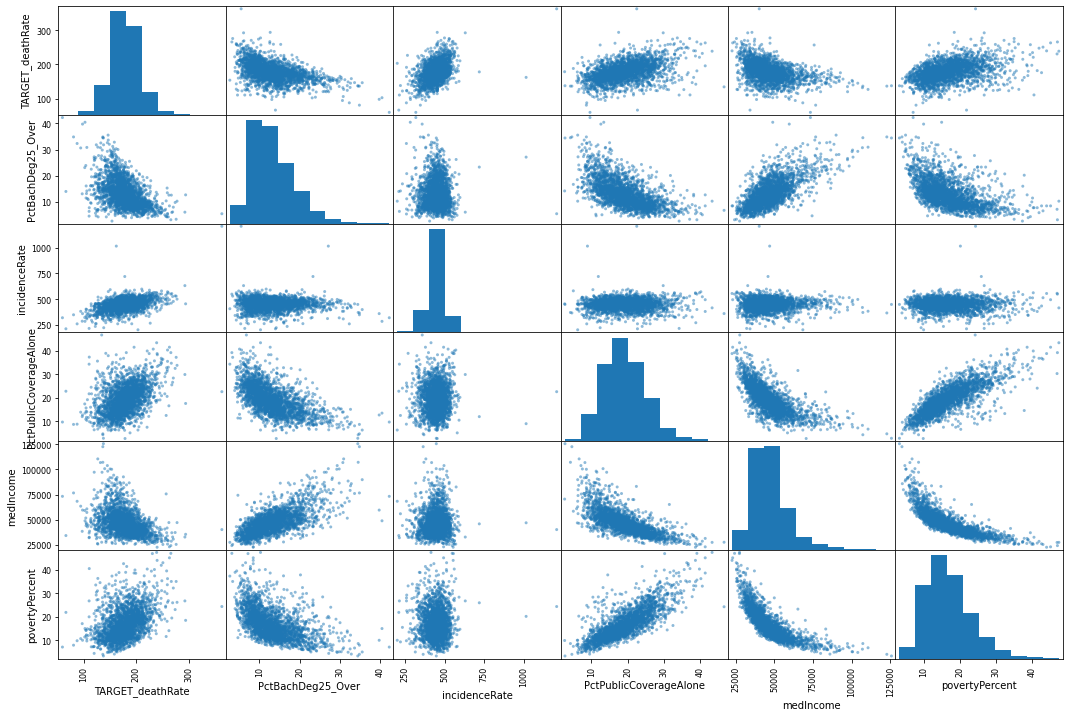

In [10]:
from pandas.plotting import scatter_matrix

attributes=["TARGET_deathRate","PctBachDeg25_Over","incidenceRate","PctPublicCoverageAlone","medIncome","povertyPercent"]

scatter_matrix(new_train_df[attributes],figsize=(18,12))

PctPublicCoverageAlone and povertyPercent show a strong positve correlation. Also target death rate and poverty percent show a correlation. This could indicate that poverty affects access to healthcare.

In [27]:
train_df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
dtype: i

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [29]:
num_pipeline = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean')),
       ('scaler', StandardScaler())
])

data = num_pipeline.fit_transform(train_df)
print(data[1])

[-0.37591237 -0.31273884 -0.80200754  0.02420626 -0.27155414 -0.47917702
 -0.29102996 -0.10337403  0.03853928  0.10018547 -0.35417811 -0.10551435
  0.20054645 -0.1564507   0.         -0.09932687  0.05728384  1.15282912
  0.9298554  -1.23264599  1.02394836  0.90277743  0.59396451 -0.60086462
 -1.03328556  0.5281407  -0.48101852 -0.24537647 -0.31647103 -0.05251527
  0.34857181]


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [105]:
test = num_pipeline.fit_transform(test_df)

lin_reg = LinearRegression()
lin_reg.fit(data, target_df)
train_pred = lin_reg.predict(data)
print("LINEAR_REGRESSION:  Mean Squared Error on Train Set = ", np.sqrt(mean_squared_error(target_df, train_pred)))

test_pred = lin_reg.predict(test)
print("LINEAR_REGRESSION:  Mean Squared Error on Test Set = ", np.sqrt(mean_squared_error(test_target_df, test_pred)))

LINEAR_REGRESSION:  Mean Squared Error on Train Set =  18.91048946506195
LINEAR_REGRESSION:  Mean Squared Error on Test Set =  22.571718052301886


In [91]:
ridge = RidgeCV(alphas=(0.1,1.0,10.0,20.0,24.0,25.0,30.0), fit_intercept=True)
ridge.fit(data, target_df['TARGET_deathRate'])
train_pred = ridge.predict(data)
train_acc1 = ridge.score(data, target_df['TARGET_deathRate'])
print("RIDGE_REGRESSION:  Mean Squared Error on Train Set = ", np.sqrt(mean_squared_error(target_df, train_pred)))

test_pred = ridge.predict(test)
print("RIDGE_REGRESSION:  Mean Squared Error on Test Set = ", np.sqrt(mean_squared_error(test_target_df, test_pred)))

print("regularization alpha value = ", ridge.alpha_)

RIDGE_REGRESSION:  Mean Squared Error on Train Set =  18.925589403030973
RIDGE_REGRESSION:  Mean Squared Error on Test Set =  22.574771159293363
regularization alpha value =  24.0


In [110]:
lasso = LassoCV(alphas=(0.01,0.1,1.0,10.0,100.0))
lasso.fit(data, target_df['TARGET_deathRate'])
train_pred = lasso.predict(data)
train_acc2 = lasso.score(data, target_df['TARGET_deathRate'])
print("LASSO_REGRESSION:  Mean Squared Error on Train Set = ", np.sqrt(mean_squared_error(target_df, train_pred)))

test_pred = lasso.predict(test)
print("LASSO_REGRESSION:  Mean Squared Error on Test Set = ", np.sqrt(mean_squared_error(test_target_df, test_pred)))

print("regularization alpha value = ", lasso.alpha_)

LASSO_REGRESSION:  Mean Squared Error on Train Set =  18.984754350159708
LASSO_REGRESSION:  Mean Squared Error on Test Set =  22.566530890984247
regularization alpha value =  0.1


I used RidgeCV and LassoCV to select the best weights and gave a range of values so that the best weight is selected. 

The best model is Lasso because the mean squared error on the test set is 22.566...
For OLS the mean squared error on train set is lowest but best model is Lasso because it performs well on test set. 


# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [93]:
coefficients = lasso.coef_
important = np.abs(coefficients)

features = list(train_df)

important_df = pd.DataFrame({"features": features, "important": important}).sort_values(by="important", ascending=False)
features.remove('PctSomeCol18_24')

important_df[:5]

,features,important
2,incidenceRate,10.755089
17,PctBachDeg25_Over,6.897884
20,PctPrivateCoverage,6.253329
29,PctMarriedHouseholds,5.792780
11,PercentMarried,4.878506


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [112]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(data, target_df['TARGET_deathRate'])
train_pred = forest.predict(data)
train_acc3 = forest.score(data, target_df['TARGET_deathRate'])

print("FOREST_REGRESSION:  Mean Squared Error on Train Set = ", np.sqrt(mean_squared_error(target_df, train_pred)))

test_pred = forest.predict(test)
print("FOREST_REGRESSION:  Mean Squared Error on Test Set = ", np.sqrt(mean_squared_error(test_target_df, test_pred)))

FOREST_REGRESSION:  Mean Squared Error on Train Set =  7.044292012905518
FOREST_REGRESSION:  Mean Squared Error on Test Set =  21.441717494174757


In [113]:
feature_importances = forest.feature_importances_
sorted(zip(feature_importances,list(train_df)),reverse=True)[:5]

[(0.2240039572660062, 'PctBachDeg25_Over'),
 (0.20556675080932638, 'incidenceRate'),
 (0.044800041437397756, 'PctHS25_Over'),
 (0.03994279692351221, 'medIncome'),
 (0.03907904467178532, 'avgDeathsPerYear')]

For Random Forest regression model the mean squared error reduces noticeably compared to Lasso regression on both train set and the test set. 

There are 2 features in common that both models have shown as important. For both models both these features are top. So we can confirm that these 2 features they have in common is the most important.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [102]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

forest = RandomForestRegressor()
forest.fit(data, target_df['TARGET_deathRate'])

X_test_prepared = num_pipeline.fit_transform(test_data)

train_pred = forest.predict(X_test_prepared)

final_mse = mean_squared_error(test_targets["TARGET_deathRate"],train_pred)
final_rsme = np.sqrt(final_mse)
print(final_rsme)

20.319706676852743
